In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",300)
pd.set_option("display.max_rows",300)

In [2]:
# loading the csv to read as pandas dataframe
df_loans = pd.read_csv("loan.csv")

In [3]:
df_loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
df_loans.shape

(39717, 111)

In [5]:
df_loans.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12942
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


## check for count of columns which has null values

In [7]:
df_loans.isnull().any().sum()

68

### There are 68 columns which has atlest one null value

## check for count of columns which has all values as not null

In [10]:
df_loans.notna().all().sum()

43

### There are 43 columns which has all not null

## check for count of columns which has all values as null

In [13]:
df_loans.isnull().all().sum()

54

### There are 54 columns which has all nulls

## Drop all the columns which have completely null values

In [16]:
df_loans.dropna(axis = 1, how = 'all', inplace = True)
df_loans.notna().all().sum()

43

### Now there are 43 columns which doesn't have any null value

In [18]:
df_loans.shape

(39717, 57)

### Now the dataframe resized from 111 columns to 57 columns by dropping all columns which doesn't have any single not null value

## Now lets check for columns which have only single unique value and drop them

In [21]:
df_loans.loc[:, df_loans.nunique() == 1].columns

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [22]:
df_loans = df_loans.loc[:, df_loans.nunique() > 1]

In [23]:
df_loans.shape

(39717, 48)

### So, the loans datframe is now resized from 57 columns to 48 columns which means there are 9 columns which has only one unqiue value

### There are 43 columns which has all not null

## Now lets' check for duplicated rows

In [27]:
df_loans[df_loans.duplicated()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies


##### So, there are no duplicate rows in our loans dataframe all the 39717 rows are unique recors.

**Drop additional columns which are not needed further in analysis**

1) pymnt_plan : value for entire dataset is 'n', therefore can be removed.
2) url : is a URL for LC page for corresponding to each memberid, nothing to do with loan default.
3) zip_code : first 3 digits of the 5 digit zip code are visible, also is redundant with addr_state, does not contribute to analysis
4) initial_list_status : value for entire dataset is 'f' out of the possible values, therefore can be removed.
5) policy_code : value for entire dataset is '1', indicating all are publicly available, therefore nothing to contribute for analysis, to be removed.
6) application_type : value for entire dataset is 'INDIVIDUAL', indicating all are individual applications not joint, therefore nothing to contribute for analysis, to be removed.
7) acc_now_delinq : value for entire dataset is '0', therefore can be removed.
8) delinq_amnt : value for entire dataset is '0', therefore can be removed.

In [30]:
columns_tobe_dropped=["url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv","delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "mths_since_last_delinq", "mths_since_last_record"]
df_loans= df_loans.drop(columns=columns_tobe_dropped,axis=1)

In [31]:
df_loans.shape

(39717, 25)

In [32]:
df_loans.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

### Loan default is not appliable to for the customers who are still havign active loan and paying installments regularly

In [34]:
df_loans = df_loans[df_loans['loan_status'].str.lower() != "current"]
df_loans.shape

(38577, 25)

##### So, there are 39717 - 38577 = 1440 customers with loan_status as "current" which are filtered for this analysis

In [36]:
df_loans.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [37]:
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38577 non-null  int64  
 1   member_id             38577 non-null  int64  
 2   loan_amnt             38577 non-null  int64  
 3   funded_amnt           38577 non-null  int64  
 4   funded_amnt_inv       38577 non-null  float64
 5   term                  38577 non-null  object 
 6   int_rate              38577 non-null  object 
 7   installment           38577 non-null  float64
 8   grade                 38577 non-null  object 
 9   sub_grade             38577 non-null  object 
 10  emp_length            37544 non-null  object 
 11  home_ownership        38577 non-null  object 
 12  annual_inc            38577 non-null  float64
 13  verification_status   38577 non-null  object 
 14  issue_d               38577 non-null  object 
 15  loan_status           38

In [38]:
(df_loans.isna().sum()/len(df_loans.index))*100

id                      0.000000
member_id               0.000000
loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
inq_last_6mths          0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_util              0.129611
total_acc               0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

#### So there are 3 columns emp_length, revol_until which has missing values

## Missing Values Imputation

In [41]:
df_loans.emp_length.value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

#### emp_length has more missing values so missing values lets replace with mode 

In [43]:
df_loans.emp_length.mode()

0    10+ years
Name: emp_length, dtype: object

In [44]:
df_loans.emp_length.fillna(df_loans.emp_length.mode()[0], inplace = True)
df_loans.emp_length.isna().sum()

0

#### revol_util field have few missing values so dropping the rows will not have any impact

In [46]:
df_loans.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
df_loans.revol_util.isna().sum()

0

In [47]:
df_loans.home_ownership.value_counts()

home_ownership
RENT        18448
MORTGAGE    17010
OWN          2970
OTHER          96
NONE            3
Name: count, dtype: int64

In [48]:
df_loans['home_ownership'].replace('NONE', 'OTHER', inplace = True)

In [49]:
df_loans.home_ownership.value_counts()

home_ownership
RENT        18448
MORTGAGE    17010
OWN          2970
OTHER          99
Name: count, dtype: int64

In [50]:
df_loans.verification_status.value_counts()

verification_status
Not Verified       16665
Verified           12196
Source Verified     9666
Name: count, dtype: int64

In [51]:
df_loans['verification_status'].replace('Source Verified', 'Verified', inplace = True)

In [52]:
df_loans.verification_status.value_counts()

verification_status
Verified        21862
Not Verified    16665
Name: count, dtype: int64

In [53]:
df_loans.pub_rec_bankruptcies.isna().sum()

697

In [54]:
df_loans = df_loans[df_loans.pub_rec_bankruptcies.notna()]

In [55]:
df_loans.shape

(37830, 25)

## Standardize Numeric Columns

In [57]:
df_loans['revol_util'].value_counts()

revol_util
0%        919
0.20%      60
63%        57
31.20%     57
70.40%     56
         ... 
77.63%      1
25.74%      1
0.83%       1
47.36%      1
7.28%       1
Name: count, Length: 1088, dtype: int64

In [58]:
df_loans['int_rate'].value_counts()

int_rate
10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
10.64%      1
20.52%      1
16.01%      1
16.96%      1
11.22%      1
Name: count, Length: 336, dtype: int64

In [59]:
df_loans['emp_length'].value_counts()

emp_length
10+ years    9398
< 1 year     4329
2 years      4202
3 years      3947
4 years      3290
5 years      3157
1 year       3071
6 years      2133
7 years      1686
8 years      1408
9 years      1209
Name: count, dtype: int64

#### revol_util. int_rate & emp_length clearly shows cleaning required as the float columns have '%' & "<" symbols

In [61]:
df_loans.revol_util = pd.to_numeric(df_loans.revol_util.apply(lambda x : str(x).split('%')[0]))

In [62]:
df_loans.int_rate = pd.to_numeric(df_loans.int_rate.apply(lambda x : x.split('%')[0]))

In [63]:
df_loans.emp_length = pd.to_numeric(df_loans.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [64]:
# convert amount columns into numeric data to find some correlation among important ones.

numeric_cols = ['loan_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length']
df_loans[numeric_cols] = df_loans[numeric_cols].apply(pd.to_numeric).apply(lambda x: round(x, 2))


In [65]:
df_loans.shape

(37830, 25)

### Outlier Treatment

<Axes: ylabel='annual_inc'>

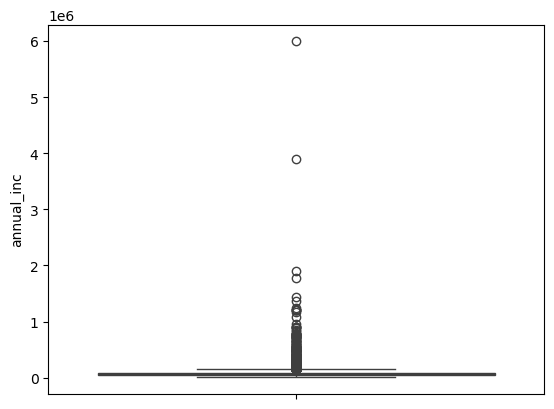

In [67]:
sns.boxplot(df_loans.annual_inc)

In [68]:
df_loans.annual_inc.describe()

count    3.783000e+04
mean     6.879568e+04
std      6.356907e+04
min      4.000000e+03
25%      4.013709e+04
50%      5.900000e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [69]:
per_95_annual_inc = df_loans['annual_inc'].quantile(0.95)
df_loans = df_loans[df_loans.annual_inc <= per_95_annual_inc]

<Axes: ylabel='annual_inc'>

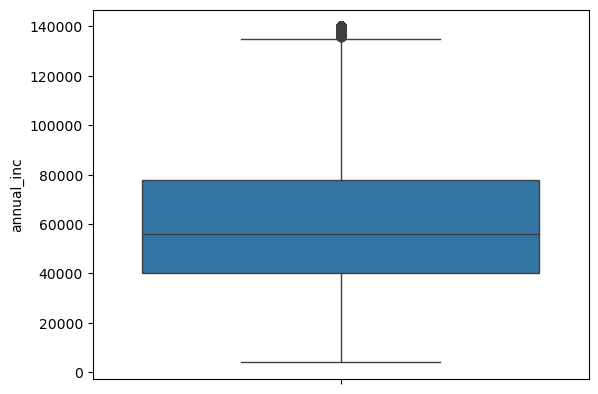

In [70]:
sns.boxplot(df_loans.annual_inc)

<Axes: ylabel='dti'>

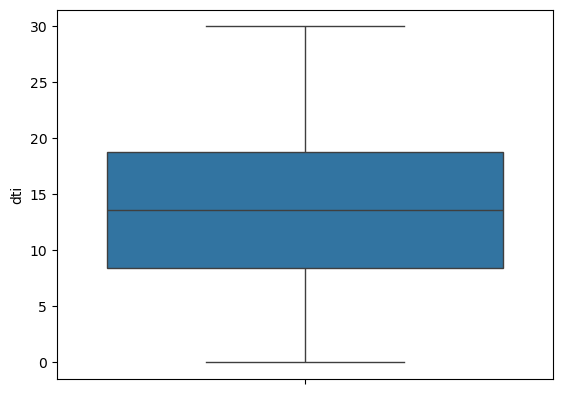

In [71]:
sns.boxplot(df_loans.dti)

<Axes: ylabel='loan_amnt'>

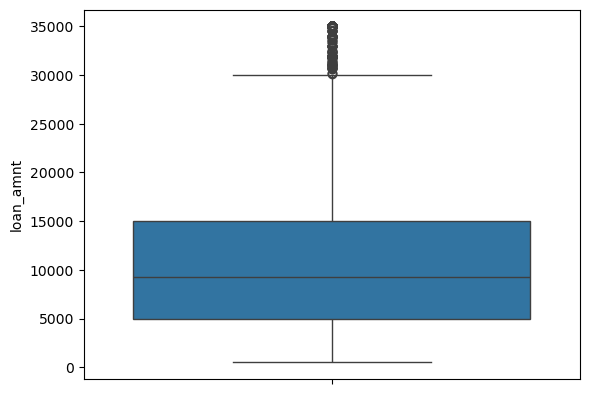

In [72]:
sns.boxplot(df_loans.loan_amnt)

<Axes: ylabel='funded_amnt_inv'>

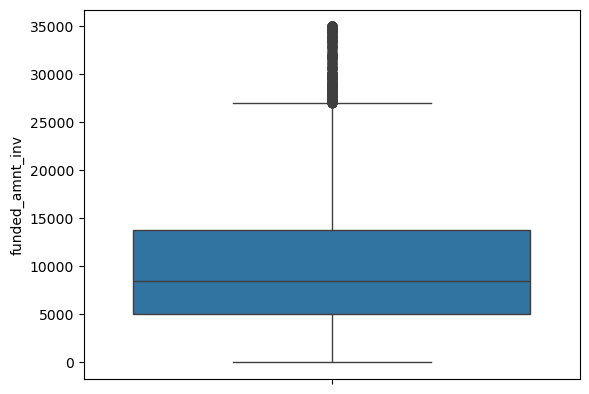

In [73]:
sns.boxplot(df_loans.funded_amnt_inv)

<Axes: ylabel='int_rate'>

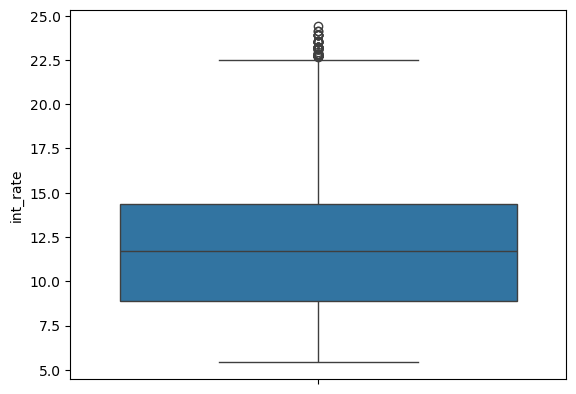

In [74]:
sns.boxplot(df_loans.int_rate)

<Axes: ylabel='installment'>

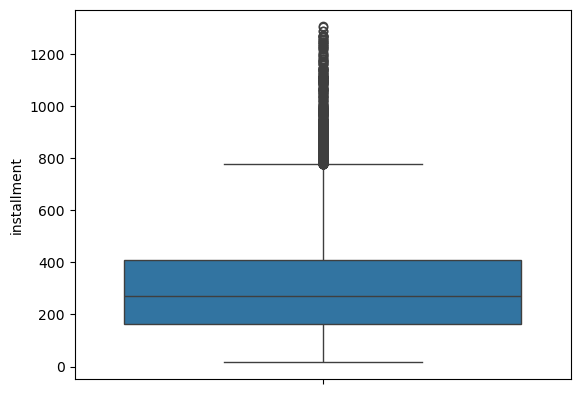

In [75]:
sns.boxplot(df_loans.installment)

**Observations or Inferences**
1) The annual income of most of the loan applicants is between 40, 000 - 75, 000 USD
2) The loan amount of most of the loan applicants is between 5, 000 - 15, 000
3) The funded amount by investor for most of the loan applicants is between 5, 000 - 14, 000 USD4
4) The interest rate on the loan is between 9% - 14%
5) The monthly installment amount on the loan is between 160 - 440
6) The debt to income ration is between 8 - 18

### Derived Columns

In [78]:
df_loans['issue_d'].value_counts().head()

issue_d
Dec-11    1967
Nov-11    1959
Oct-11    1809
Sep-11    1790
Aug-11    1700
Name: count, dtype: int64

In [79]:
# Extracting Month and Year for analysis from issue_d
df_month_year = df_loans['issue_d'].str.partition("-", True)     
df_loans['issue_month']=df_month_year[0]                       
df_loans['issue_year']='20' + df_month_year[2]

In [80]:
# Define a mapping of month abbreviation to quarter
month_to_quarter = {
    'Jan': 1, 'Feb': 1, 'Mar': 1,  # Q1
    'Apr': 2, 'May': 2, 'Jun': 2,  # Q2
    'Jul': 3, 'Aug': 3, 'Sep': 3,  # Q3
    'Oct': 4, 'Nov': 4, 'Dec': 4   # Q4
}

In [81]:
df_loans['issue_quarter'] = df_loans['issue_month'].map(month_to_quarter)

<Axes: xlabel='issue_year', ylabel='count'>

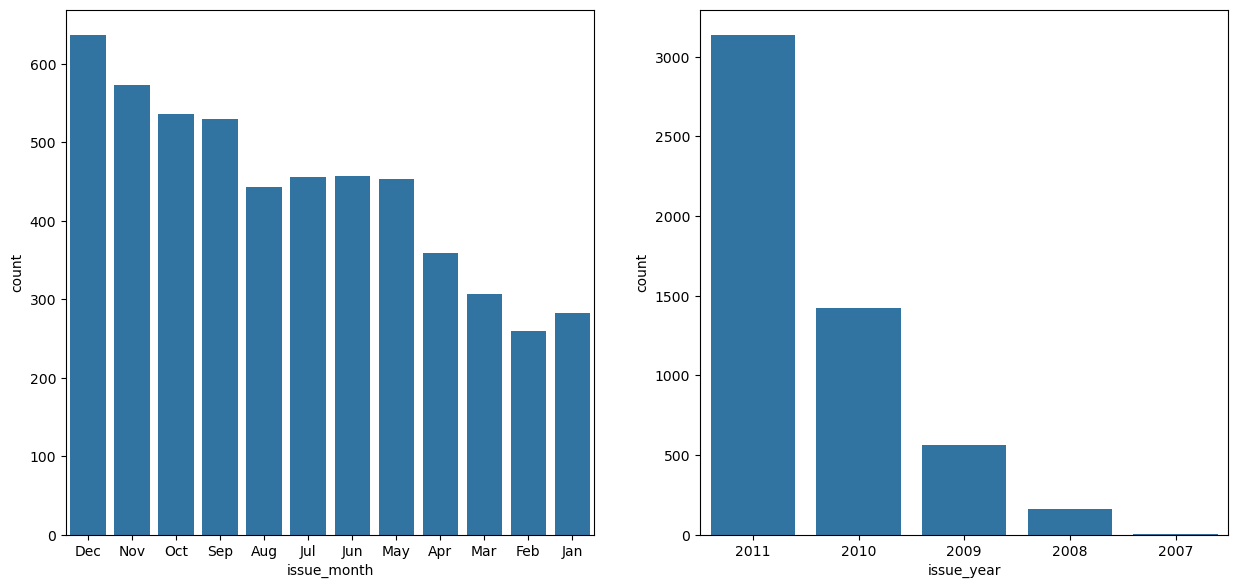

In [82]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_month', data=df_loans[df_loans['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_year', data=df_loans[df_loans['loan_status']=='Charged Off'])

### Bar chart clearly shows maximum number of defautlers present in 2011

Following fields will be checked as part of univariate analysis

1. Categorical variables
  1. Ordered categorical data
        1. Grade (grade)
        2. Sub grade (sub_grade)
        3. Term (36 / 60 months) (term)
        4. Employment length (emp_length)
        5. Issue year (issue_y)
        6. Issue month (issue_m)
        7. Issue quarter (issue_q)

 2. Unordered categorical data
    1. Address State (addr_state)
    2. Loan purpose (purpose)
    3. Home Ownership (home_ownership)
    4. Loan status (loan_status)
    5. Loan paid (loan_paid)
2. Quantitative variables
    1. Interest rate bucket (int_rate_buckets)
    2. Open Credit lines bucket (open_acc_buckets)
    3. Revolving line utilization rate bucket (revol_util_buckets)
    4. Total Credit lines bucket(total_acc_buckets)
    5. Annual income bucket (annual_inc_buckets)
    6. Loan amount bucket (loan_amnt_buckets)
    7. Funded amount bucket (funded_amnt_buckets)
    8. Debt to Income Ratio (DTI) bucket (dti_buckets)

In [85]:
#creating bins for int_rate,open_acc,revol_util,total_acc
df_loans['int_rate_buckets'] = pd.cut(df_loans['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
df_loans['open_acc_buckets'] = pd.cut(df_loans['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
df_loans['revol_util_buckets'] = pd.cut(df_loans['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
df_loans['total_acc_buckets'] = pd.cut(df_loans['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
df_loans['annual_inc_buckets'] = pd.cut(df_loans['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])
df_loans['loan_amnt_buckets'] = pd.cut(df_loans['loan_amnt'], bins=4,precision =0,labels = ['0-5k', '5k-10k', '10k-15k', '15k-above'])
df_loans['funded_amnt_buckets'] = pd.cut(df_loans['funded_amnt'], bins=4,precision =0,labels = ['0-5k', '5k-10k', '10k-15k', '15k-above'])
df_loans['dti_buckets'] = pd.cut(df_loans['dti'], bins=5,precision =0, labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High'])

<Axes: ylabel='grade'>

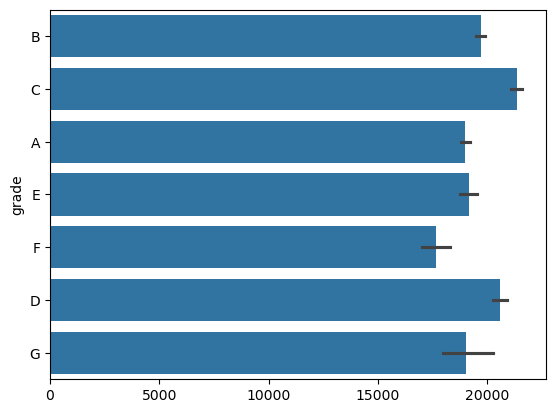

In [86]:
sns.barplot(df_loans['grade'])

<Axes: ylabel='sub_grade'>

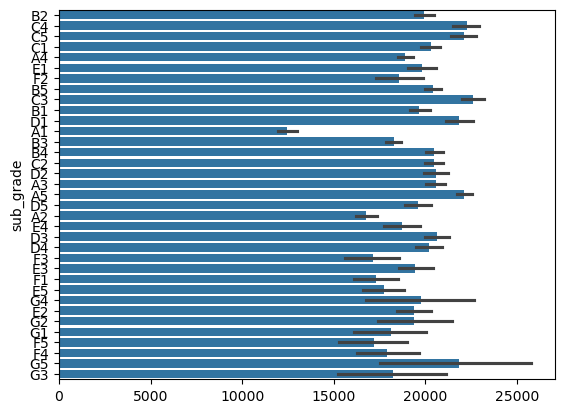

In [87]:
sns.barplot(df_loans['sub_grade'])

<Axes: ylabel='term'>

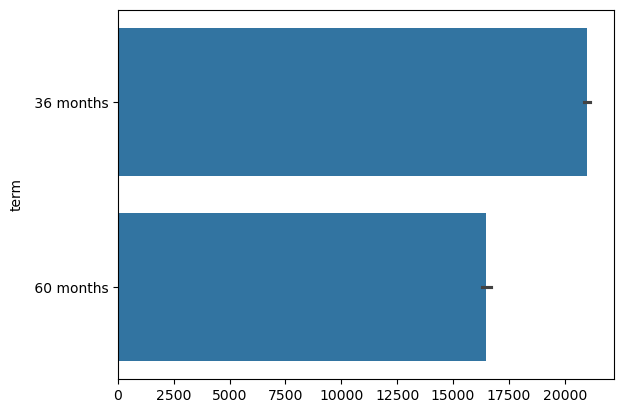

In [88]:
sns.barplot(df_loans['term'])

<Axes: ylabel='emp_length'>

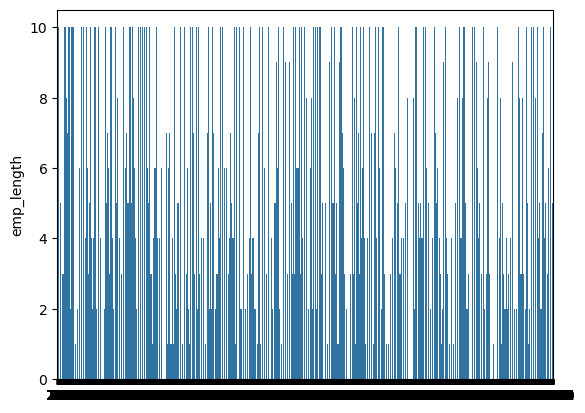

In [89]:
sns.barplot(df_loans['emp_length'])

<Axes: ylabel='issue_year'>

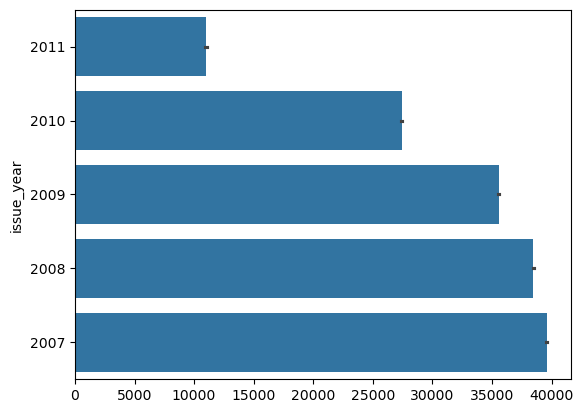

In [90]:
sns.barplot(df_loans['issue_year'])

<Axes: ylabel='issue_month'>

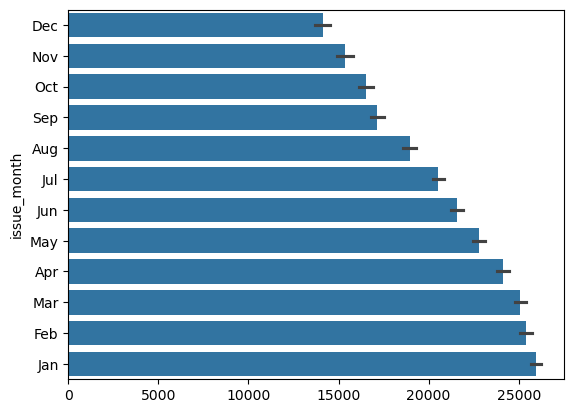

In [91]:
sns.barplot(df_loans['issue_month'])

<Axes: ylabel='issue_quarter'>

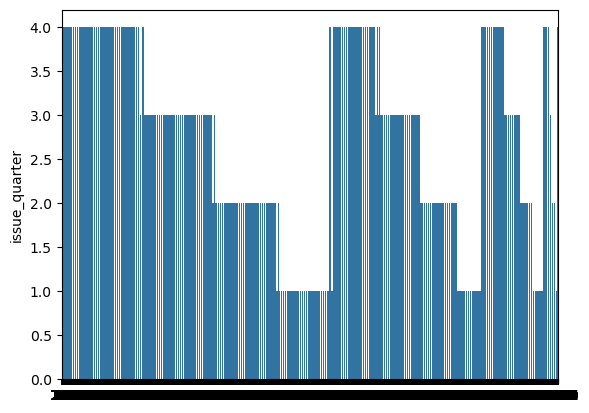

In [92]:
sns.barplot(df_loans['issue_quarter'])

<Axes: ylabel='purpose'>

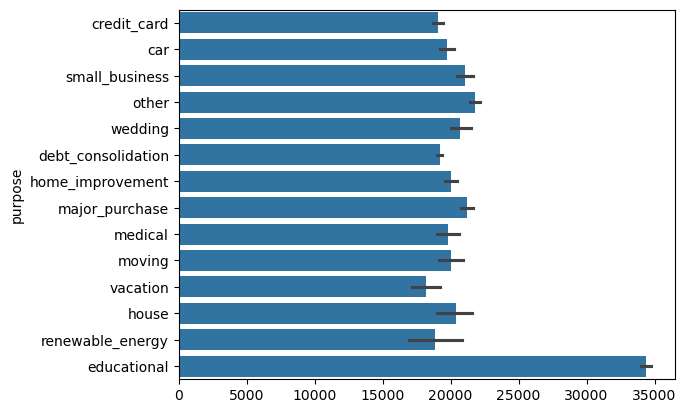

In [93]:
sns.barplot(df_loans['purpose'])

<Axes: ylabel='home_ownership'>

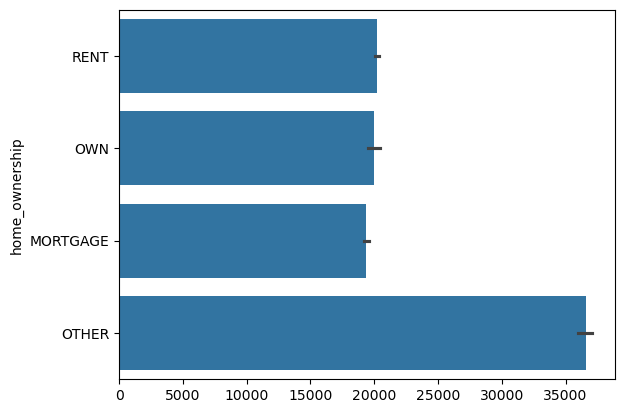

In [94]:
sns.barplot(df_loans['home_ownership'])

<Axes: ylabel='loan_status'>

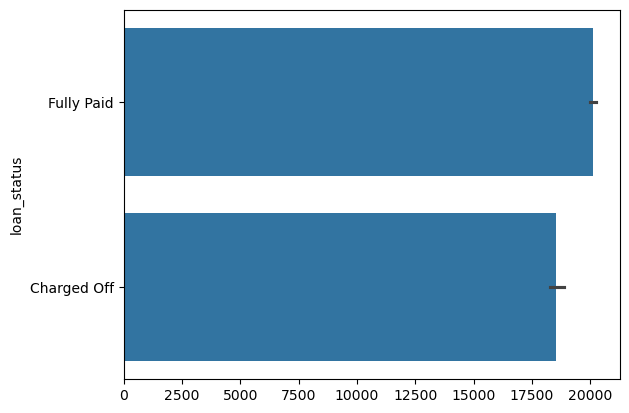

In [95]:
sns.barplot(df_loans['loan_status'])

<Axes: ylabel='int_rate_buckets'>

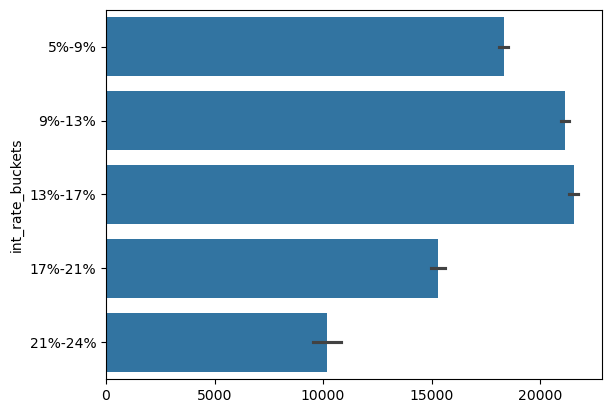

In [96]:
sns.barplot(df_loans['int_rate_buckets'])

<Axes: ylabel='open_acc_buckets'>

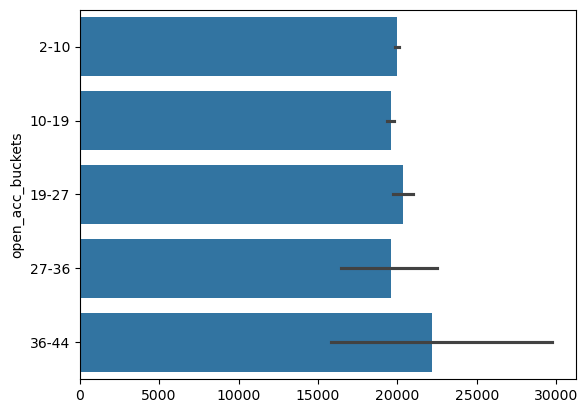

In [97]:
sns.barplot(df_loans['open_acc_buckets'])

<Axes: ylabel='revol_util_buckets'>

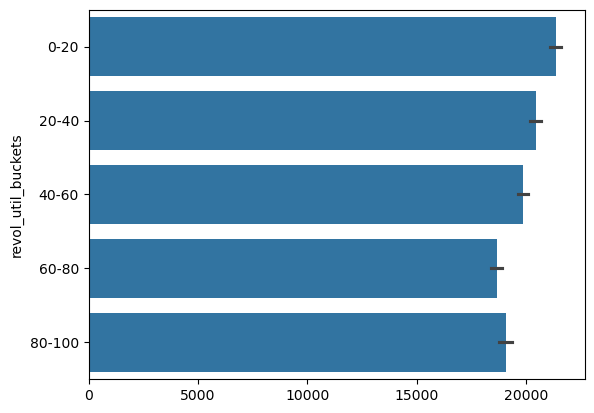

In [98]:
sns.barplot(df_loans['revol_util_buckets'])

<Axes: ylabel='total_acc_buckets'>

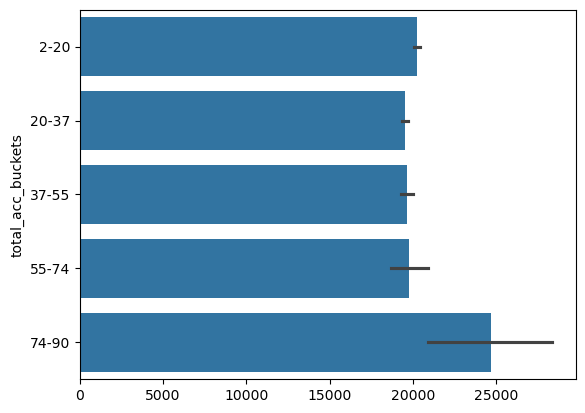

In [99]:
sns.barplot(df_loans['total_acc_buckets'])

<Axes: ylabel='annual_inc_buckets'>

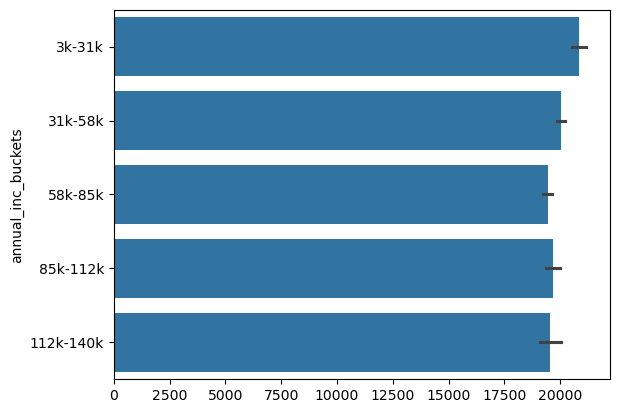

In [100]:
sns.barplot(df_loans['annual_inc_buckets'])

<Axes: ylabel='loan_amnt_buckets'>

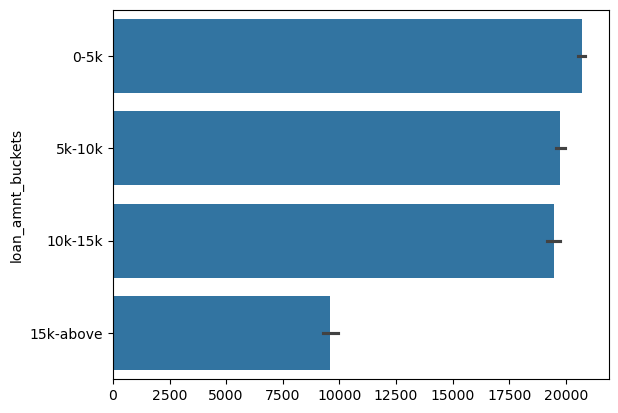

In [101]:
sns.barplot(df_loans['loan_amnt_buckets'])

<Axes: ylabel='funded_amnt_buckets'>

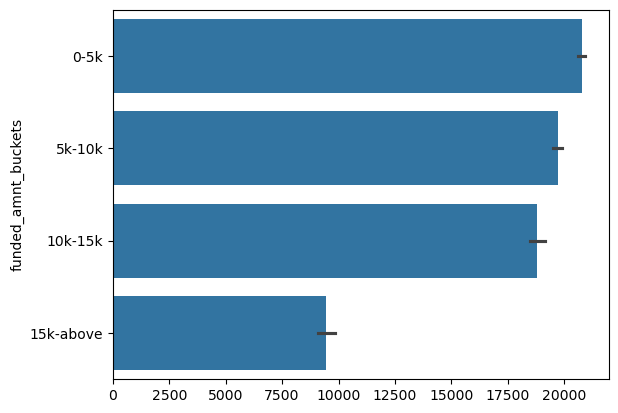

In [102]:
sns.barplot(df_loans['funded_amnt_buckets'])

<Axes: ylabel='dti_buckets'>

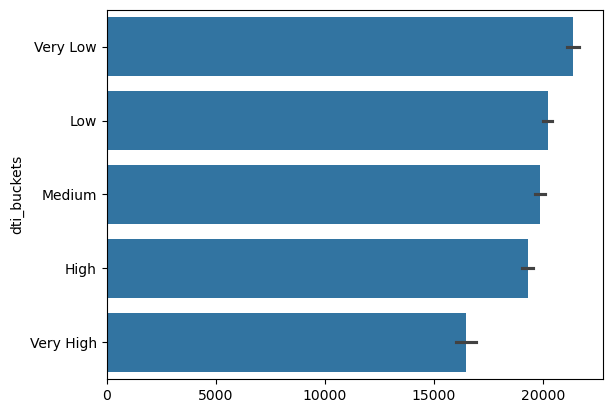

In [103]:
sns.barplot(df_loans['dti_buckets'])

Bivariate Analysis
Following fields will be analysed as part of bivariate analysis against Loan Status (loan_status) column

1. Categorical variables
1. Ordered categorical data
    1. Grade (grade)
    2. Sub grade (sub_grade)
    3. Term (36 / 60 months) (term)
    4. Employment length (emp_length)
    5. Issue year (issue_y)
    6. Issue month (issue_m)
    7. Issue quarter (issue_q)

2. Unordered categorical data
    1. Loan purpose (purpose)
    2. Home Ownership (home_ownership)
    3. Verification Status (verification_status)
    4. Address State (addr_state)
    
2. Quantitative variables
1. Int Rate Bucket (int_rate_bucket)
2. Debt to Income Bucket (dti_bucket)
3. Annual Income Bucket (annual_inc_bucket)
4. Funded Amount Bucket (funded_amnt_bucket)
5. Loan Amount Bucket (loan_amnt_bucket)

<Axes: xlabel='loan_status', ylabel='count'>

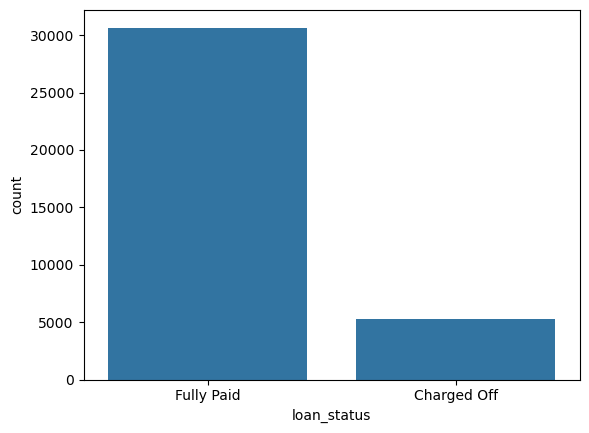

In [105]:
sns.countplot(x ='loan_status', data = df_loans)

<Axes: xlabel='grade', ylabel='count'>

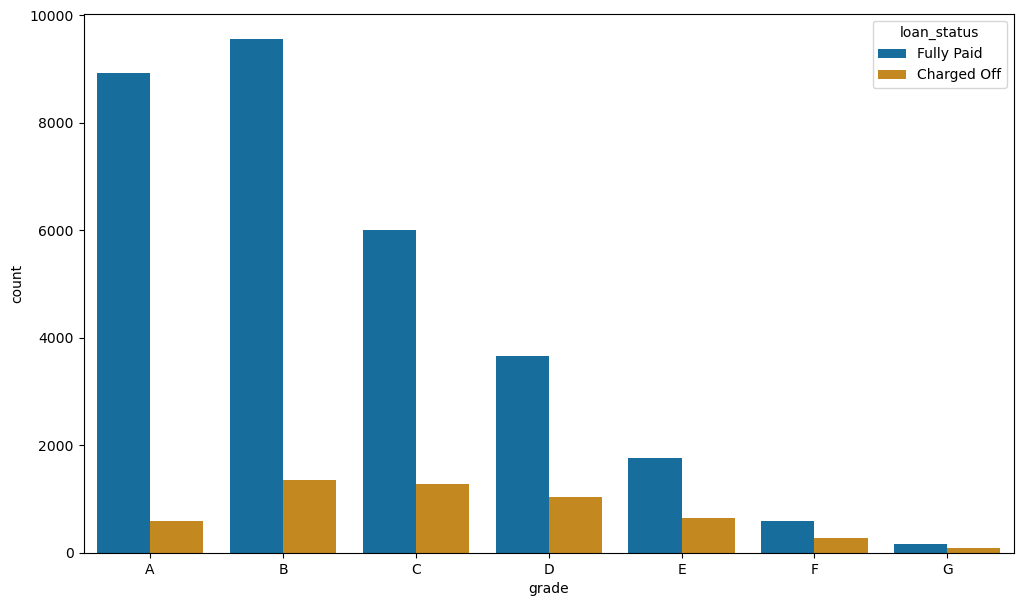

In [106]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'loan_status',data = df_loans)

<Axes: xlabel='sub_grade', ylabel='count'>

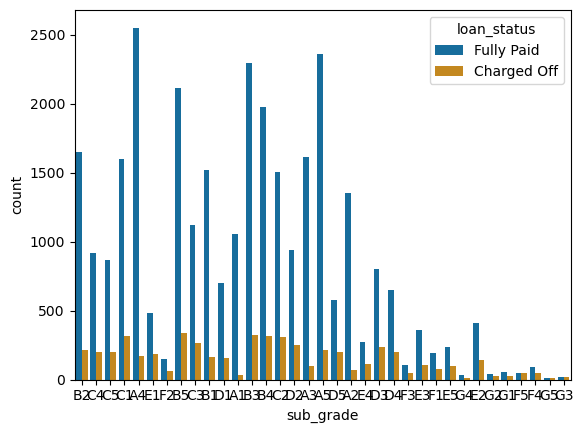

In [107]:
sns.countplot(x = 'sub_grade', hue = 'loan_status', data = df_loans)

<Axes: xlabel='home_ownership', ylabel='count'>

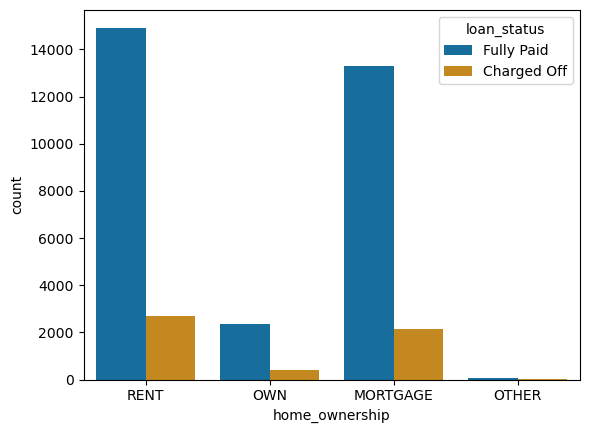

In [108]:
sns.countplot(x='home_ownership', hue = 'loan_status', data=df_loans)

<Axes: xlabel='term', ylabel='count'>

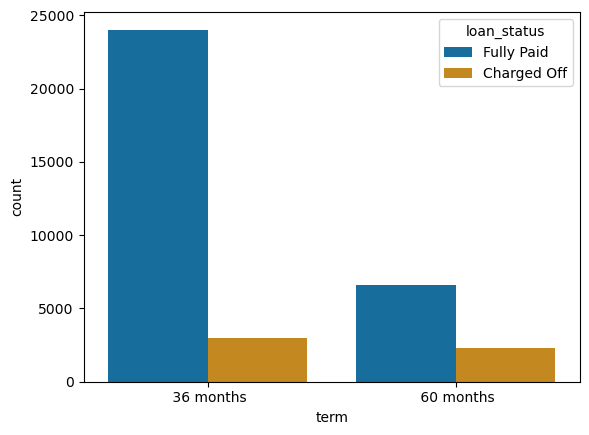

In [109]:
sns.countplot(x='term',  hue = 'loan_status', data=df_loans)

<Axes: xlabel='emp_length', ylabel='count'>

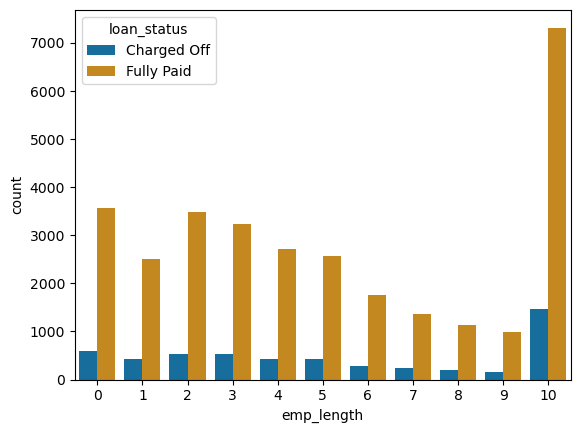

In [110]:
sns.countplot(x='emp_length',  hue = 'loan_status', data=df_loans)

<Axes: xlabel='issue_year', ylabel='count'>

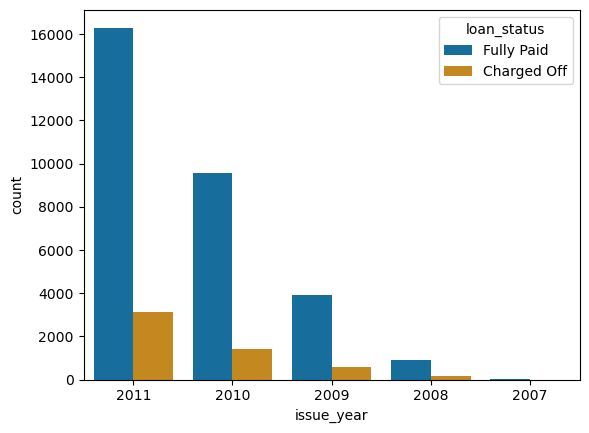

In [111]:
sns.countplot(x='issue_year',  hue = 'loan_status', data=df_loans)

<Axes: xlabel='issue_month', ylabel='count'>

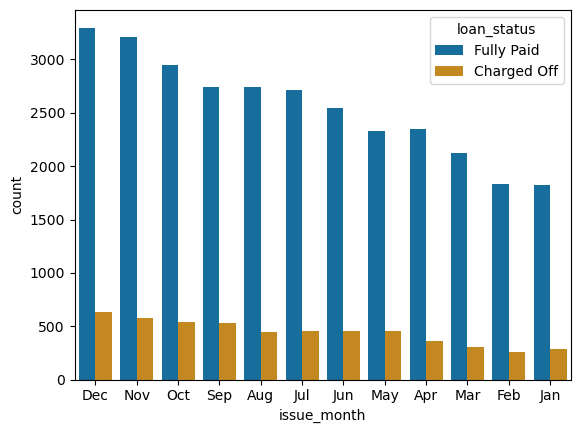

In [112]:
sns.countplot(x='issue_month',  hue = 'loan_status', data=df_loans)

<Axes: xlabel='issue_quarter', ylabel='count'>

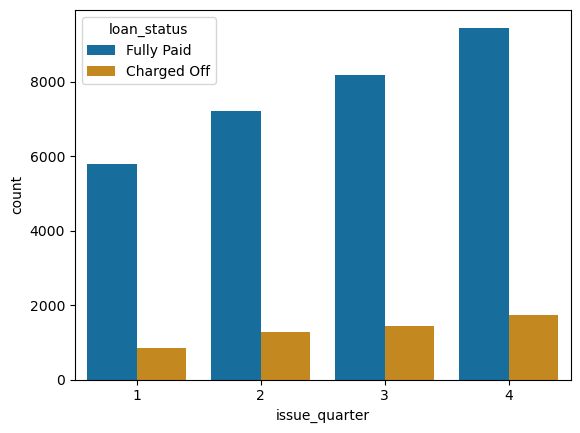

In [113]:
sns.countplot(x='issue_quarter',  hue = 'loan_status', data=df_loans)

<Axes: xlabel='purpose', ylabel='count'>

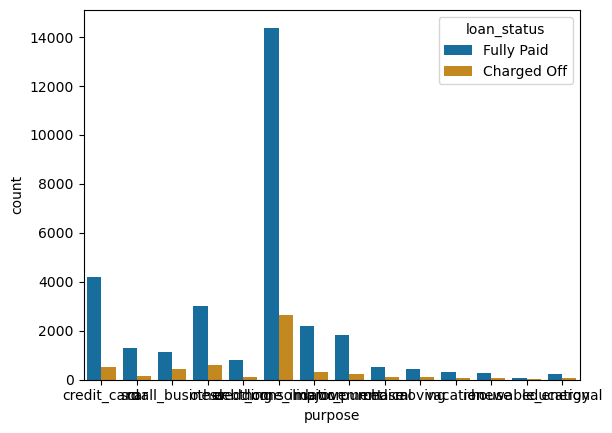

In [114]:
sns.countplot(x='purpose',  hue = 'loan_status', data=df_loans)

<Axes: xlabel='home_ownership', ylabel='count'>

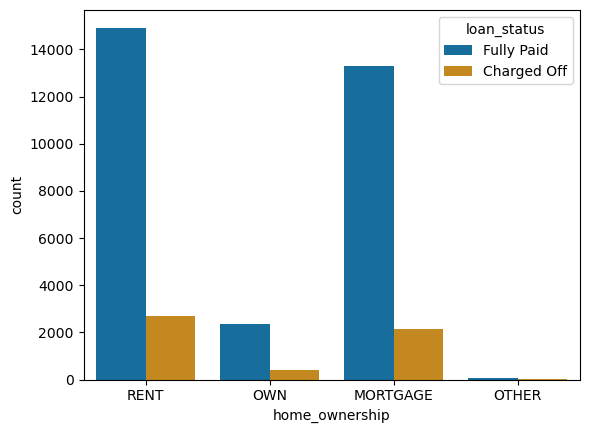

In [115]:
sns.countplot(x='home_ownership',  hue = 'loan_status', data=df_loans)

<Axes: xlabel='verification_status', ylabel='count'>

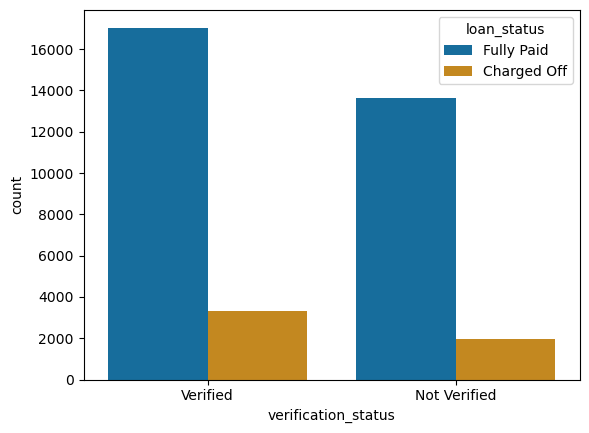

In [116]:
sns.countplot(x='verification_status',  hue = 'loan_status', data=df_loans)

<Axes: xlabel='annual_inc_buckets', ylabel='count'>

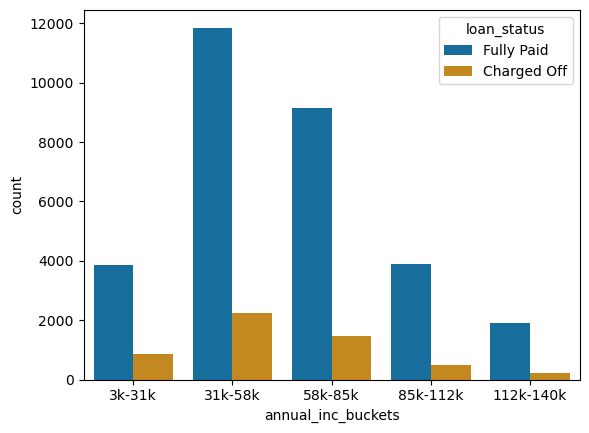

In [117]:
sns.countplot(x='annual_inc_buckets',  hue = 'loan_status', data=df_loans)

<Axes: xlabel='open_acc_buckets', ylabel='count'>

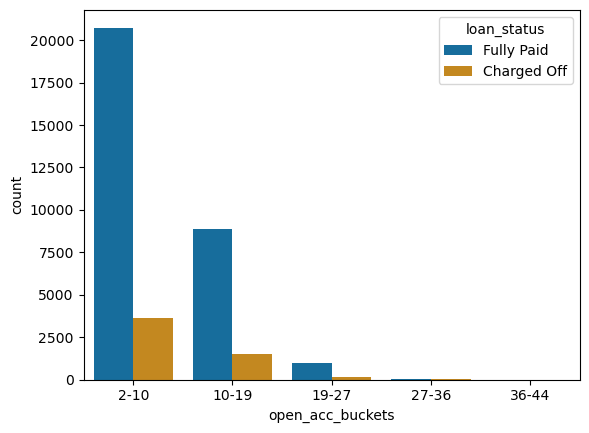

In [118]:
sns.countplot(x='open_acc_buckets',  hue = 'loan_status', data=df_loans)

<Axes: xlabel='int_rate_buckets', ylabel='count'>

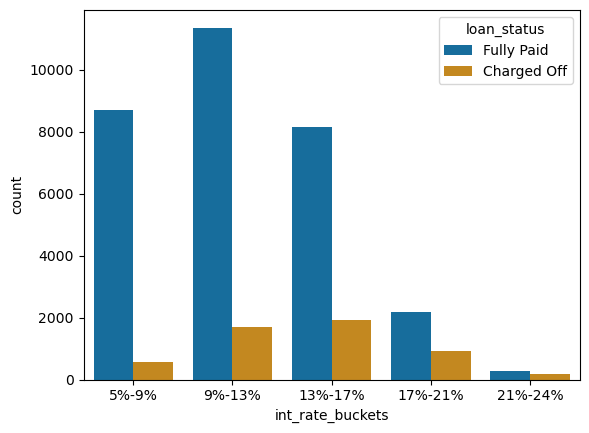

In [119]:
sns.countplot(x='int_rate_buckets',  hue = 'loan_status', data=df_loans)

<Axes: xlabel='total_acc_buckets', ylabel='count'>

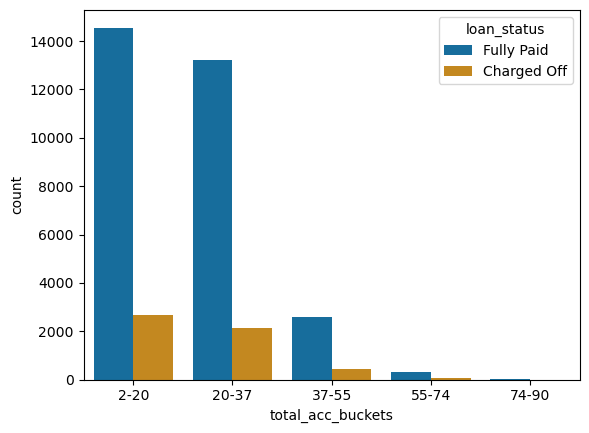

In [120]:
sns.countplot(x='total_acc_buckets',  hue = 'loan_status', data=df_loans)

<Axes: xlabel='revol_util_buckets', ylabel='count'>

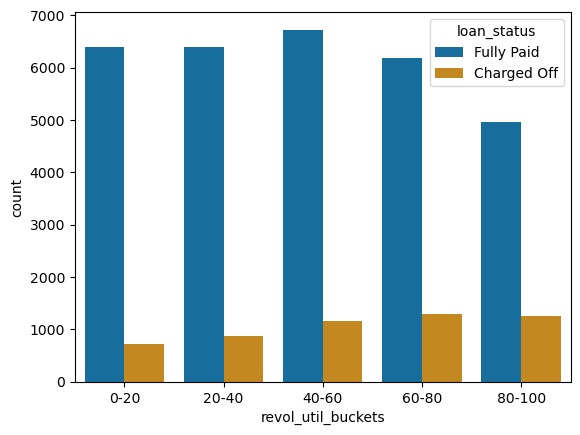

In [121]:
sns.countplot(x='revol_util_buckets',  hue = 'loan_status', data=df_loans)

<Axes: xlabel='loan_amnt_buckets', ylabel='count'>

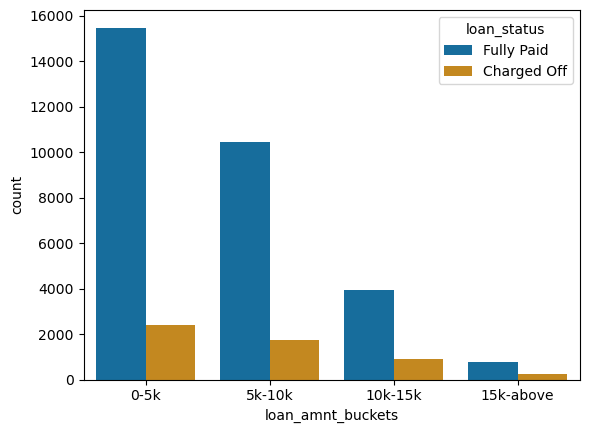

In [122]:
sns.countplot(x='loan_amnt_buckets',  hue = 'loan_status', data=df_loans)

<Axes: xlabel='dti_buckets', ylabel='count'>

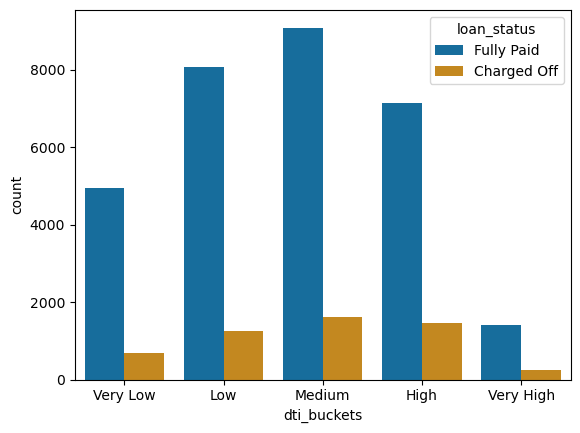

In [123]:
sns.countplot(x='dti_buckets',  hue = 'loan_status', data=df_loans)